Restaurants data analysis and Recommendation system

In [1]:
!pip install sklearn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('zomato.csv')

In [3]:
df.columns

Index(['id', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.rename(columns={"Unnamed: 0": "id"}, inplace= True)
df.drop(['url', 'address','phone','menu_item'],axis=1)

,id,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
51714,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [5]:
df.to_csv('zomato.csv',index=False)

In [10]:
df.describe()

,id,votes
count,51717.000000,51717.000000
mean,25858.000000,283.697527
std,14929.556273,803.838853
min,0.000000,0.000000
25%,12929.000000,7.000000
50%,25858.000000,41.000000
75%,38787.000000,198.000000
max,51716.000000,16832.000000


In [15]:
len(df['name'].unique())   #no of unique restaurant names

8792

Data Cleaning

In [13]:
df.isna().sum()


id                                 0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [21]:
null = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending=False), 
                     'Percentage Null Values' : (df.isnull().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
print(null)

                             Null Values  Percentage Null Values
dish_liked                         28078               54.291626
rate                                7775               15.033741
phone                               1208                2.335789
approx_cost(for two people)          346                0.669026
rest_type                            227                0.438927
cuisines                              45                0.087012
location                              21                0.040606
listed_in(type)                        0                0.000000
menu_item                              0                0.000000
reviews_list                           0                0.000000
id                                     0                0.000000
url                                    0                0.000000
votes                                  0                0.000000
book_table                             0                0.000000
online_order             

In [28]:
#normalising rating column
def split(x):
    return x.split('/')[0]

df['rate']=df['rate'].apply(split)

In [350]:
df['rate'].unique()
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)
df['rate']=df['rate'].astype(float)

Exploratory Data Analysis

                 rate     votes  approx_cost
rate         1.000000  0.280632     0.249930
votes        0.280632  1.000000     0.367466
approx_cost  0.249930  0.367466     1.000000


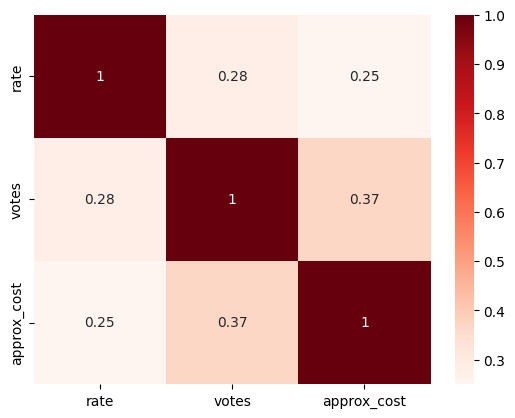

In [347]:
df1 = pd.DataFrame().assign(rate = df['rate'], votes = df['votes'], 
approx_cost = df['approx_cost(for two people)'])
print(df1.corr())
plot = sns.heatmap(df1.corr(), cmap = "Reds", annot = True)
plt.show()

# cor = df.corr(method = 'kendall')
# print(corr)
# plot = sns.heatmap(cor, cmap = "Reds", annot = True)
# plt.show()

In [348]:
sample = pd.read_csv('zomato.csv').iloc[:5]
sample

,id,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [41]:
#average rating of each restaurant
data_rate=df.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.iloc[1:10]

,restaurant,rating
1,#L-81 Cafe,3.900
2,#refuel,3.700
3,1000 B.C,3.200
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
5,11 to 11 Express Biriyanis,3.500
6,1131 Bar + Kitchen,4.500
7,12th Main - Grand Mercure,4.100
8,1441 Pizzeria,4.100
9,1522 - The Pub,4.212


<Axes: xlabel='name'>

C:\Users\PranavC\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
C:\Users\PranavC\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\PranavC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PranavC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


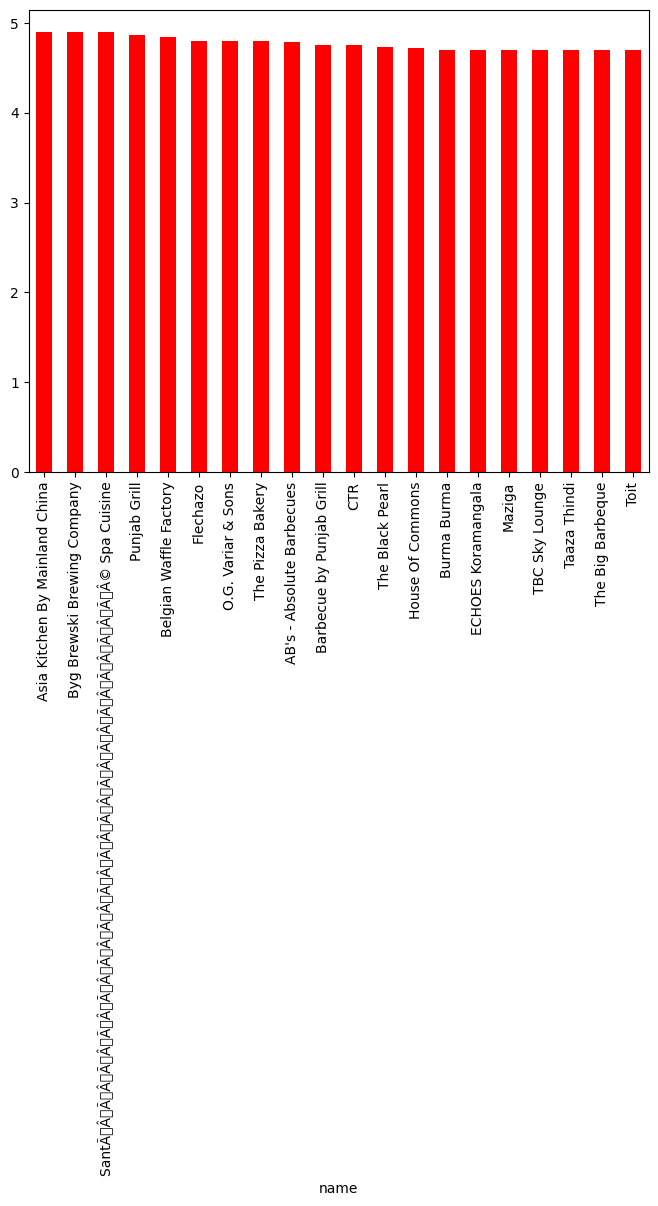

In [48]:
plt.figure(figsize=(8,6))
df.groupby('name')['rate'].mean().nlargest(20).plot.bar(color='red')

C:\Users\PranavC\AppData\Local\Temp\ipykernel_16028\909972436.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rate['rating'] ,color='red')


<Axes: xlabel='rating', ylabel='Density'>

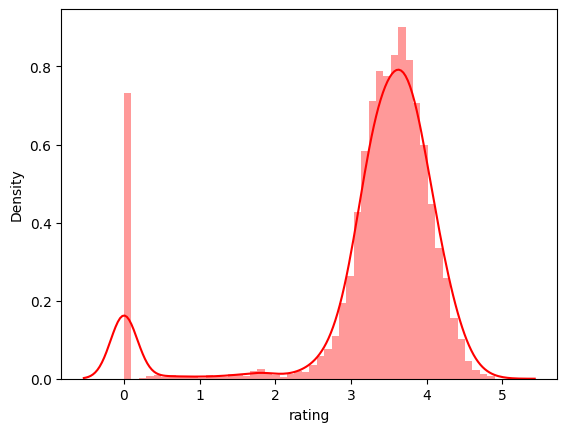

In [61]:
sns.set_style()
sns.distplot(data_rate['rating'] ,color='red')

Text(0.5, 0, 'Number of outlets')

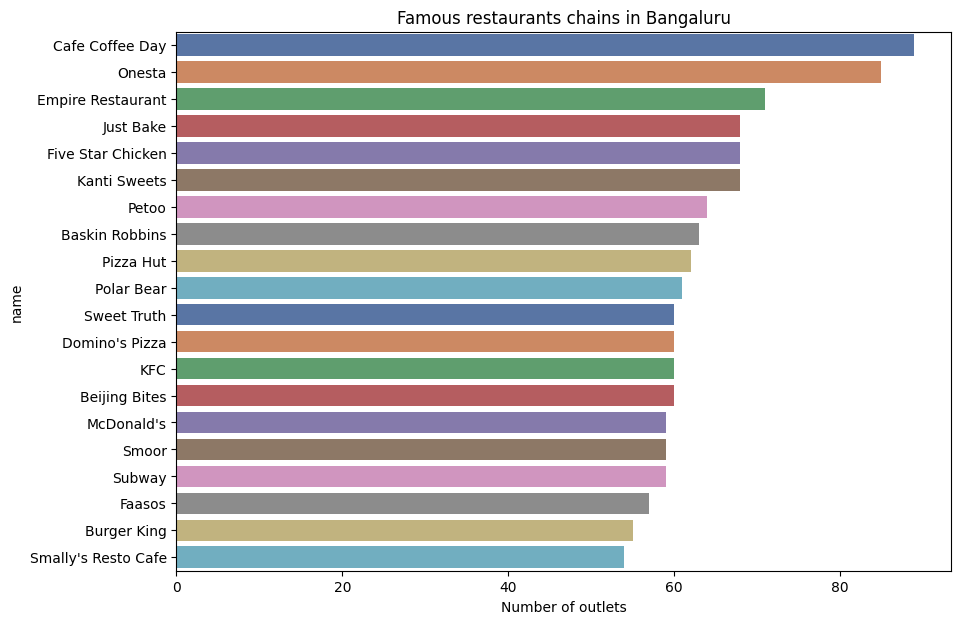

In [66]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

In [80]:
#analysing the online orders placed
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.pie(df, labels=df['online_order'])
plt.show()

In [91]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [349]:
fig = px.pie(df, values=x, names=labels)
fig.show()

KeyError: 'count'

In [102]:
df['rest_type'].isna().sum()

151

In [104]:
df['rest_type'].dropna(inplace=True)

In [105]:
len(df['rest_type'].unique())

88

<Axes: xlabel='rest_type'>

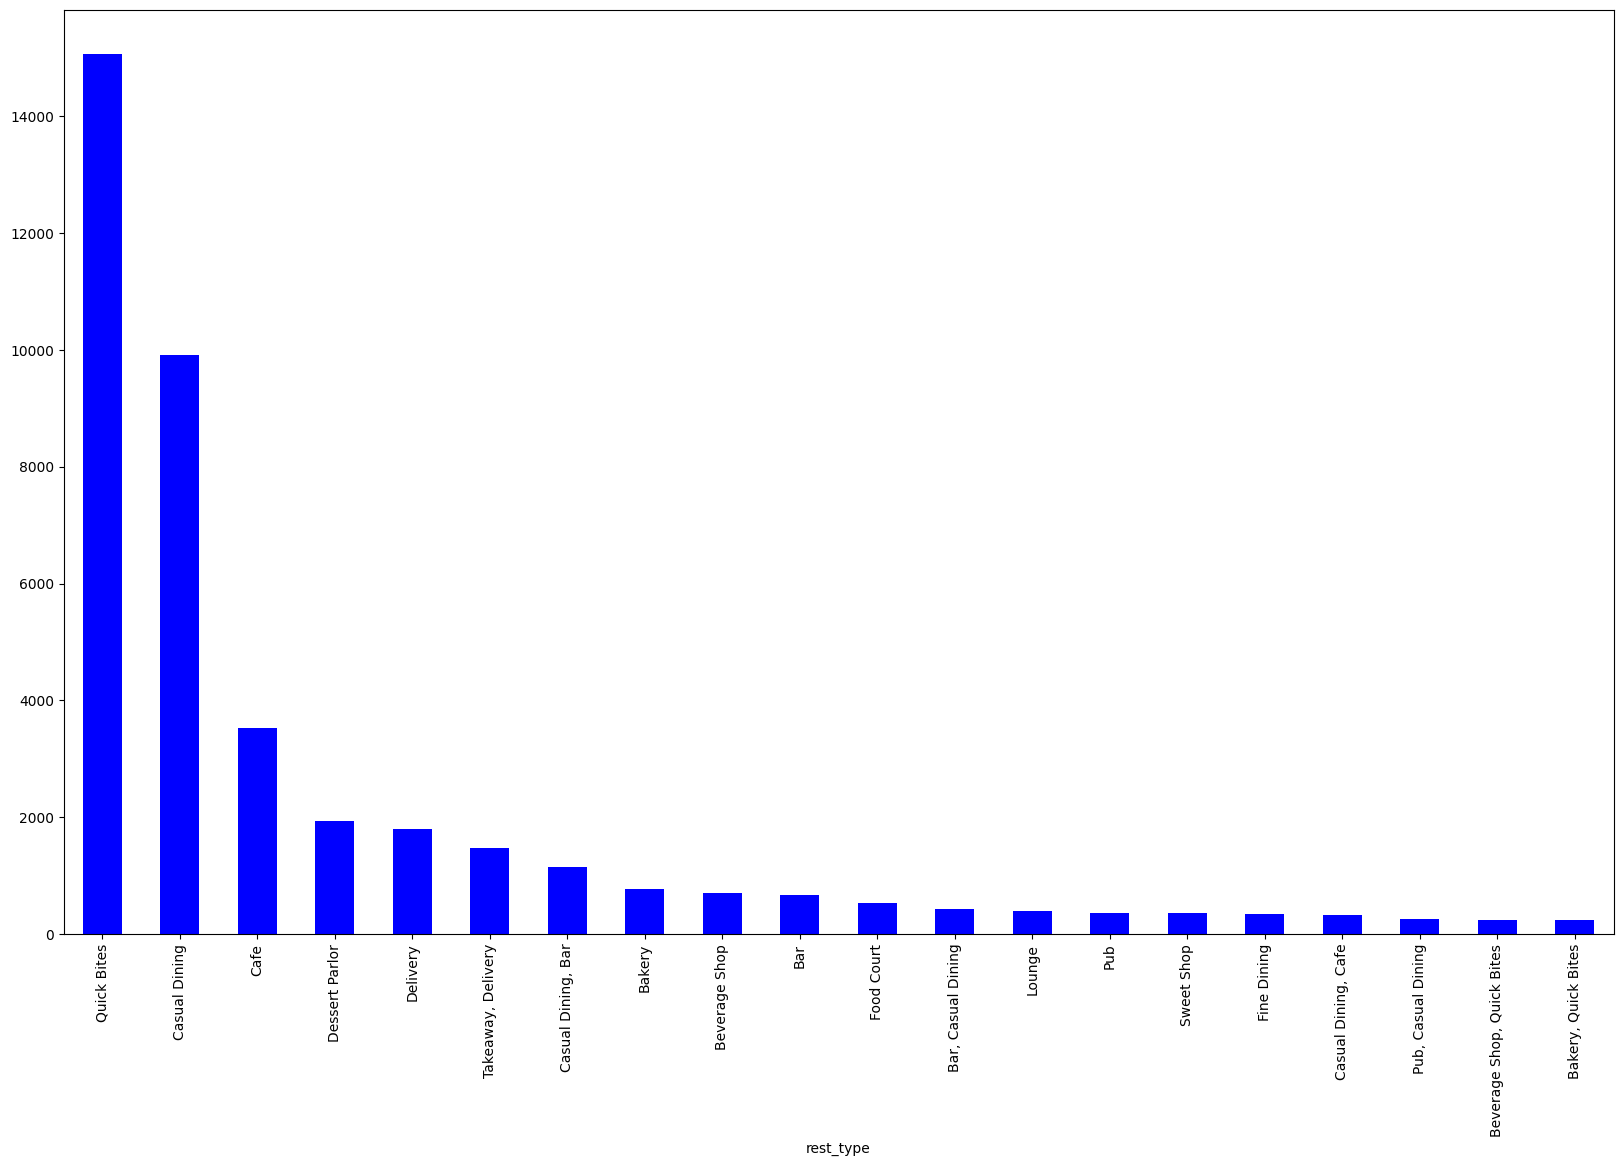

In [110]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')

<Axes: xlabel='name'>

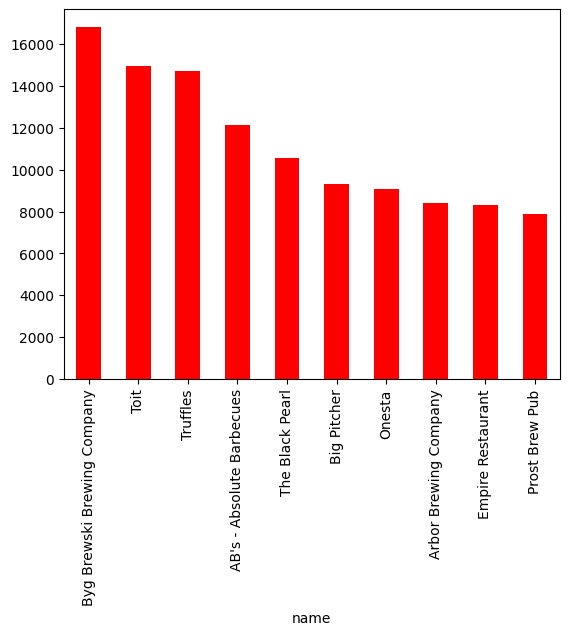

In [111]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar(color='red')

In [113]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [125]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant', ascending= False).head(10)

,restaurant
location,
Whitefield,634
BTM,581
HSR,553
Marathahalli,525
Electronic City,518
Indiranagar,467
JP Nagar,400
Bannerghatta Road,362
Jayanagar,311


<Axes: xlabel='location'>

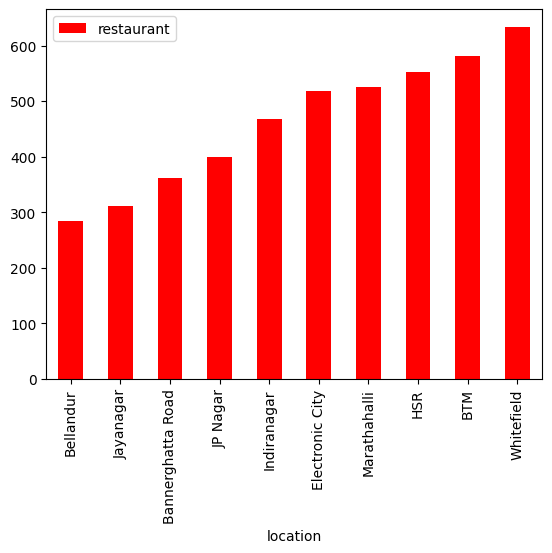

In [127]:
df_total.sort_values(by='restaurant').tail(10).plot.bar(color='red')

Cuisines analysis

Text(0.5, 0, 'Count')

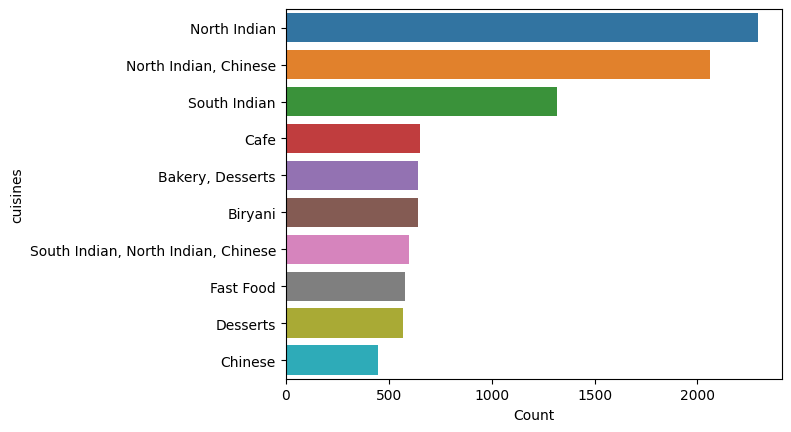

In [135]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x = cuisines,y=cuisines.index)
plt.xlabel('Count')

In [136]:
df['approx_cost(for two people)'].isna().sum()

252

In [138]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [141]:
df['approx_cost(for two people)'].dtype
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [142]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [143]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [150]:
df['approx_cost(for two people)'].mean()

594.2702220187685

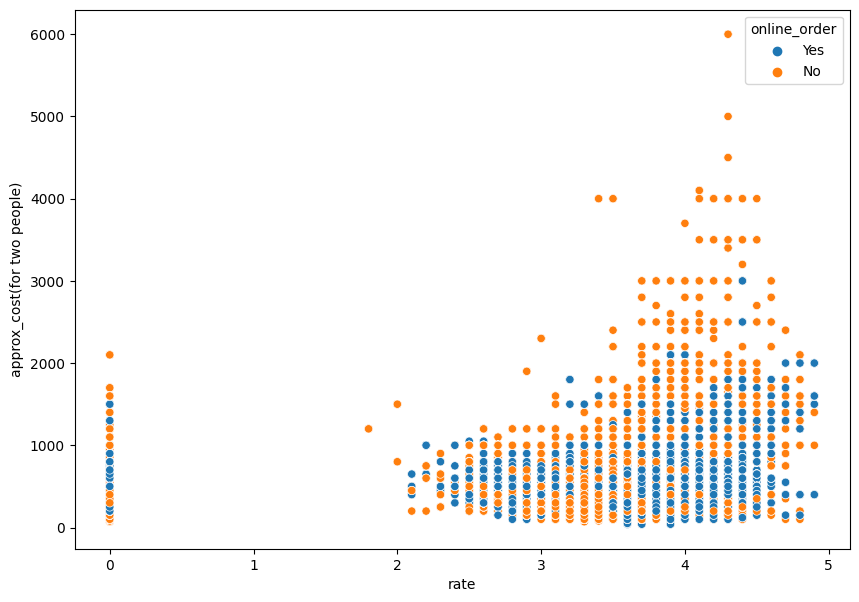

In [151]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

<Axes: xlabel='online_order', ylabel='votes'>

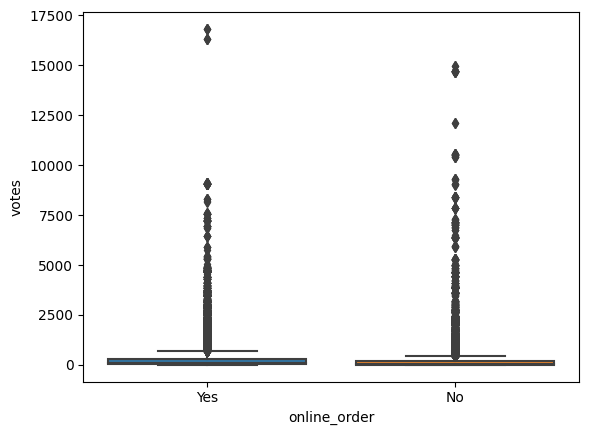

In [152]:
sns.boxplot(x='online_order',y='votes',data=df)


C:\Users\PranavC\AppData\Local\Temp\ipykernel_16028\50386012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['approx_cost(for two people)'] ,color='blue')


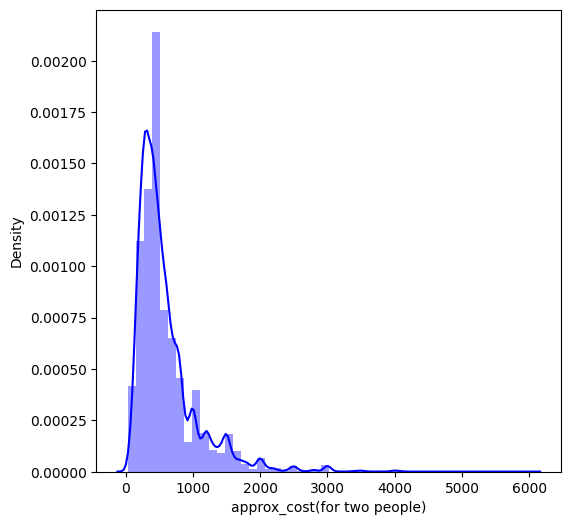

In [153]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'] ,color='blue')
plt.show()

<Axes: xlabel='approx_cost(for two people)'>

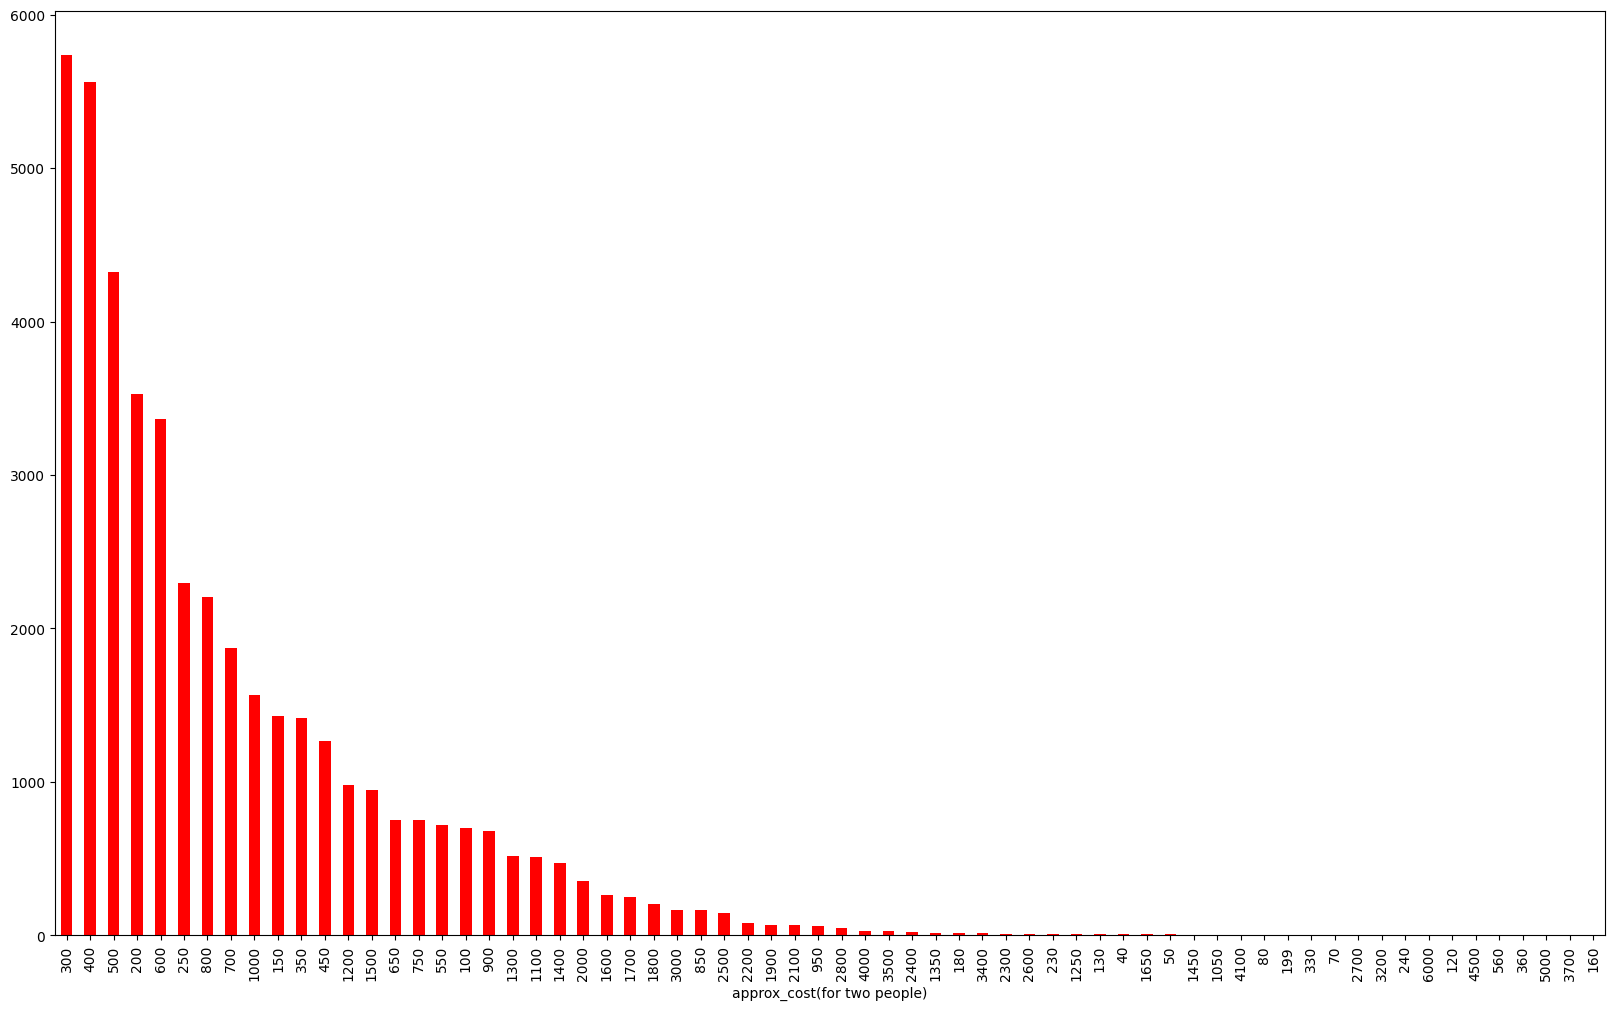

In [160]:
plt.figure(figsize=(20,12))
df['approx_cost(for two people)'].value_counts().plot.bar(color='red')

<Axes: xlabel='name'>

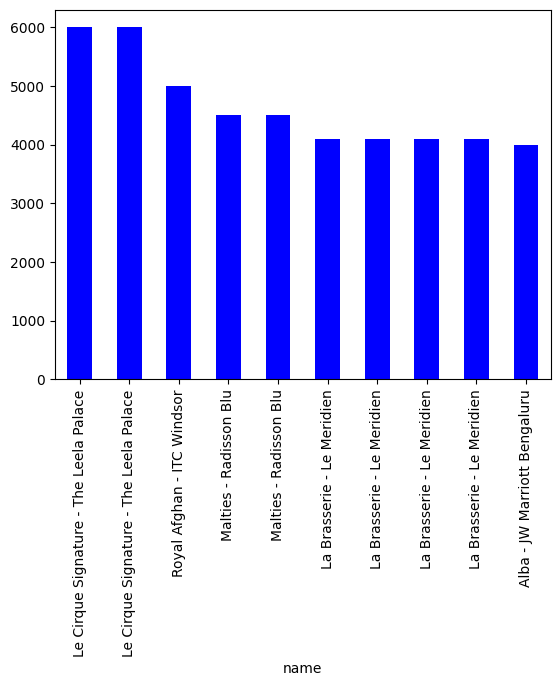

In [172]:
data = df.copy()
data.set_index('name',inplace=True)

data['approx_cost(for two people)'].nlargest(10).plot.bar(color='blue')

<Axes: xlabel='name'>

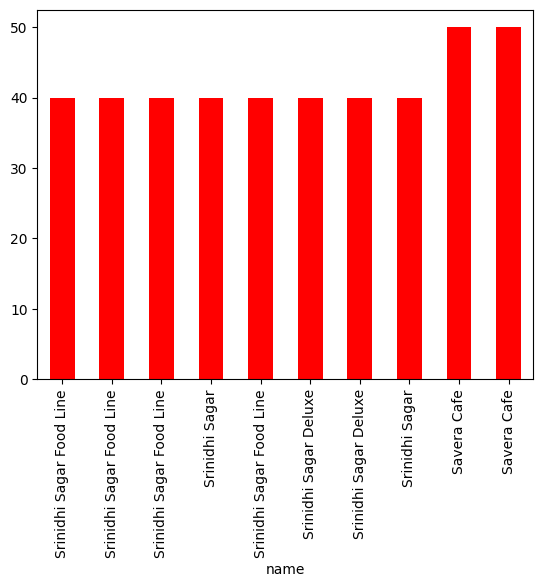

In [173]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar(color='red')


In [181]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()

In [182]:
df.columns

Index(['id', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Top 15 places having cost lesser than average cost

<Axes: xlabel='location'>

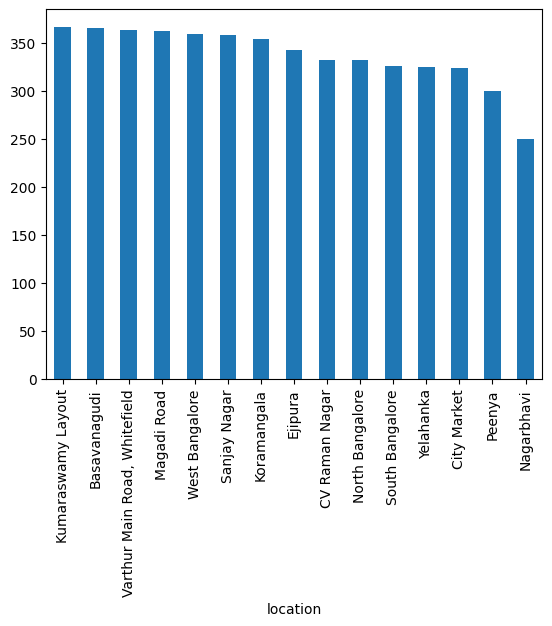

In [187]:
avg_cost = df.groupby('location')['approx_cost(for two people)'].mean()
top_10_avg = avg_cost.sort_values(ascending= False).tail(15)

plt.figure()
top_10_avg.plot(kind = 'bar')

In [194]:
len(data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)])

4007

In [196]:
#restaurants having rating > 4 and cost being less than 500
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

Text(0, 0.5, 'Total restaurants')

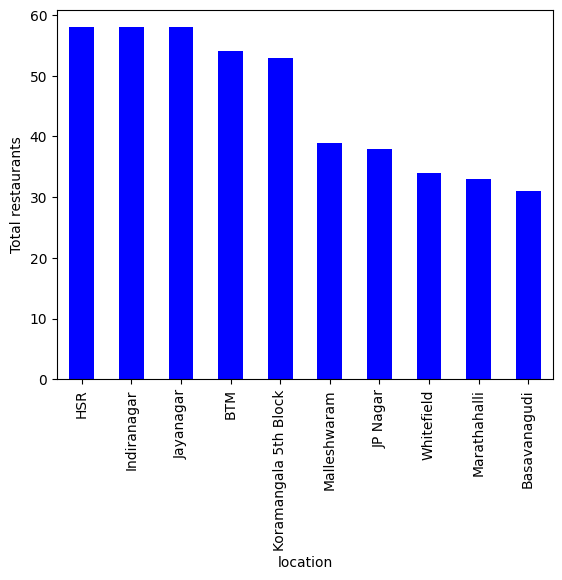

In [199]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

location_df['restaurant'].nlargest(10).plot.bar(color='blue')
plt.ylabel('Total restaurants')

analysing places that have most restaurants

<Axes: xlabel='count', ylabel='location'>

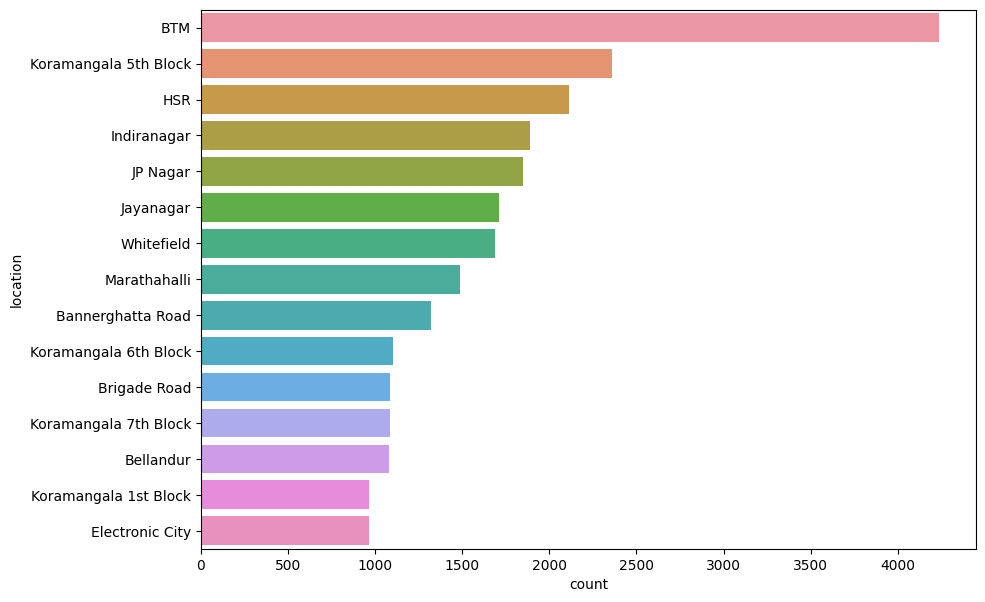

In [208]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:15]
sns.barplot(x= Restaurant_locations,y = Restaurant_locations.index)

generating lat, and long data and visualising a heatmap of the count of rest. based on the location

In [209]:
!pip install geopy

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [210]:
from geopy.geocoders import Nominatim

In [212]:
locations=pd.DataFrame({"Name":data['location'].unique()})

In [234]:
locations['geo_loc']=lat_lon

In [235]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [236]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())


In [237]:
Rest_locations.columns=['Name','count']

In [238]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,geo_loc
0,BTM,4237,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,"(12.9348429, 77.6189768)"
2,HSR,2113,"(18.1475, 41.538889)"
3,Indiranagar,1892,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,"(12.2655944, 76.6465404)"


In [239]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [240]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.910648, 77.6001409), (12.9390255, 77.6238477),
       (12.9750849, 77.6079337), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (15.67509025, 73.81083634836561), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5759032, -74.1252963),
       (34.0699187, 74.8052392), (33.5935063, -79.0345627),
       (12.9986827, 77.615525), (40.7153533, -74.0076212),
       (13.0093455, 77.6377094), (13.0267404, 77.5717955),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77.554883), (

In [241]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [218]:
!pip install folium

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [242]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [257]:
basemap

In [247]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [269]:
import pandas as pd
location_data = Restaurant_locations
location_data.to_csv('lat_lon.csv', index = False)

In [294]:
df.isna().sum()

id                                 0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [285]:
col_sum = location_data['count'].sum()
print('sum', col_sum)

sum 43662


In [249]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [12.9348429, 77.6189768, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [53.5533682, -2.2969019, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.910648, 77.6001409, 1318.0],
 [12.9390255, 77.6238477, 1103.0],
 [12.9750849, 77.6079337, 1084.0],
 [12.9364846, 77.6134783, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 964.0],
 [15.67509025, 73.81083634836561, 963.0],
 [12.920441, 77.6653284, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [40.5759032, -74.1252963, 626.0],
 [34.0699187, 74.8052392, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.9986827, 77.615525, 574.0],
 [40.7153533, -74.0076212, 550.0],
 [13.0093455

In [250]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [256]:
basemap